<a href="https://colab.research.google.com/github/ananyadix/customer_segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df['Gender'].unique()
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


In [8]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [9]:
df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [10]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<ipython-input-11-5c9bfeb4bab1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

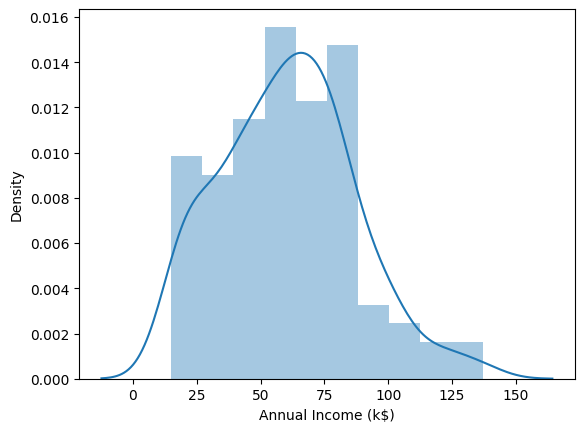

In [11]:
sns.distplot(df['Annual Income (k$)'])

<ipython-input-12-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

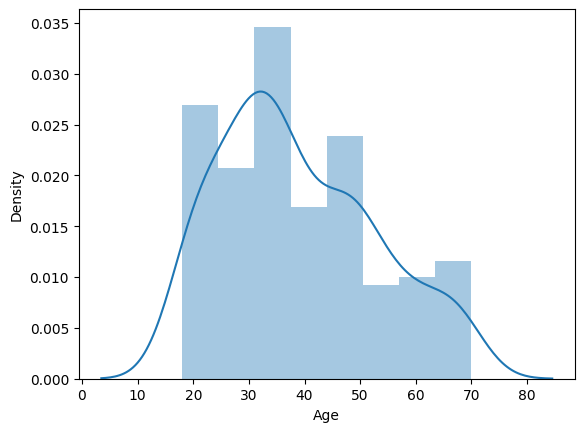

In [12]:
sns.distplot(df['Age'])

<ipython-input-13-beed7b40d5ab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

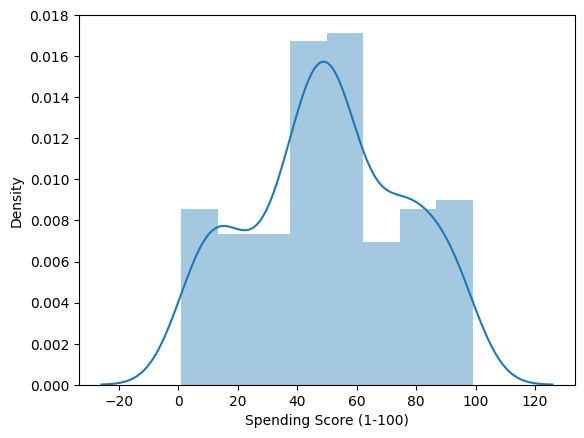

In [13]:
sns.distplot(df['Spending Score (1-100)'])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

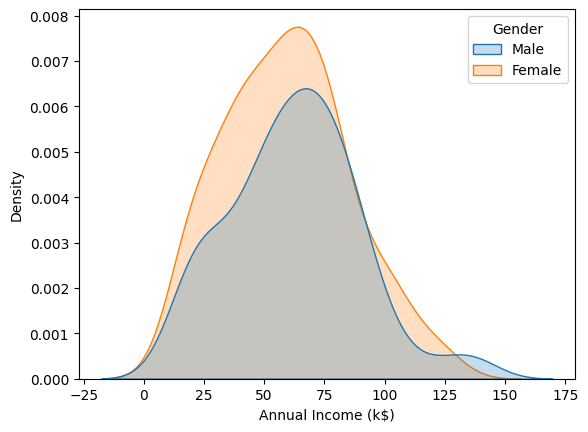

In [14]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', fill=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

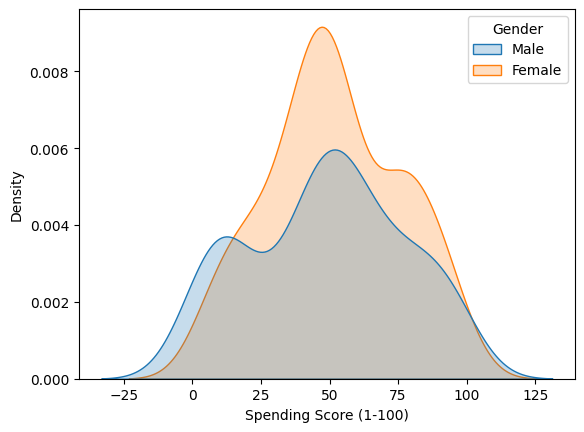

In [15]:
sns.kdeplot(data=df, x='Spending Score (1-100)', hue='Gender', fill=True)

<Axes: xlabel='Age', ylabel='Density'>

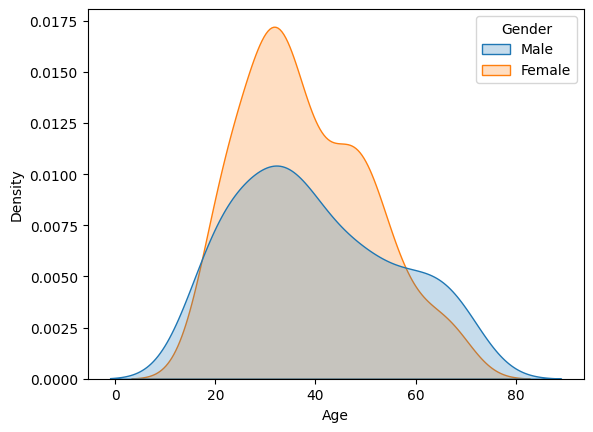

In [16]:
sns.kdeplot(data=df, x='Age', hue='Gender', fill=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

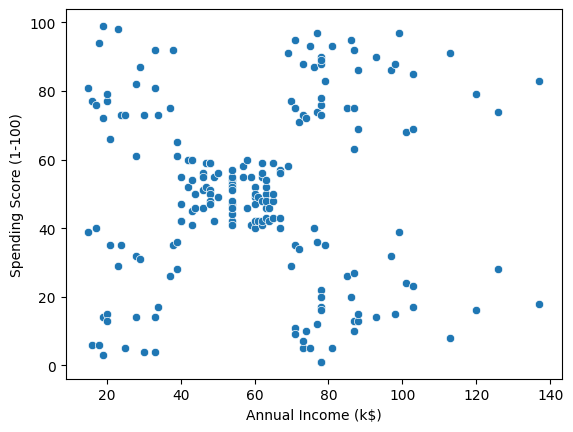

In [17]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

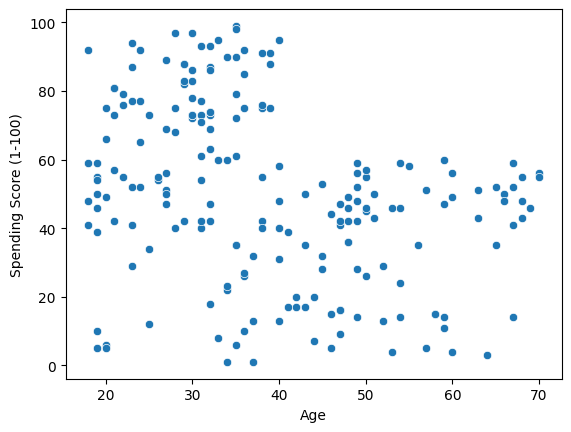

In [18]:
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)')

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

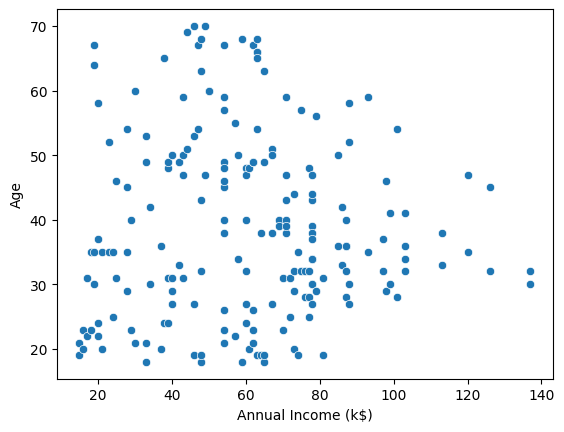

In [19]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Age')

In [20]:
df=df.drop("CustomerID",axis=1)

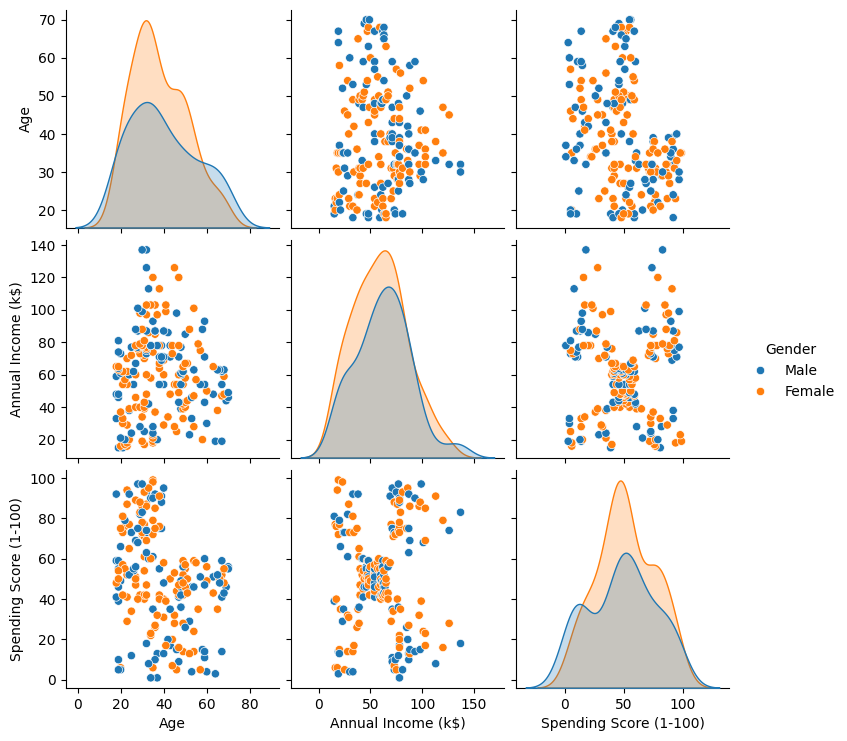

In [21]:
sns.pairplot(df,hue="Gender")

In [22]:
df.groupby("Gender").mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

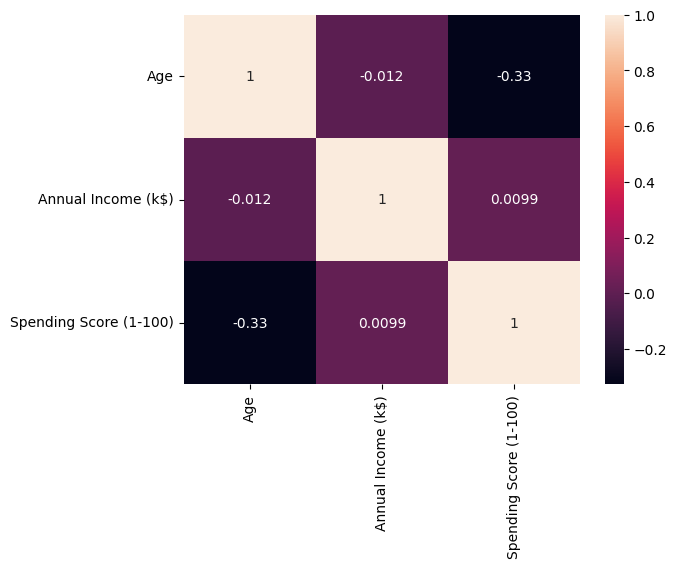

In [23]:
sns.heatmap(df.drop('Gender',axis=1).corr(),annot=True)

In [24]:
from sklearn.cluster import KMeans

In [25]:
c1_inertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df['Annual Income (k$)'].values.reshape(-1,1))
  c1_inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [26]:
c1_inertia

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13308.108021390372,
 8481.49619047619,
 5050.904761904766,
 3949.275613275612,
 2990.5348045674145,
 2208.8120490620495,
 1758.8120490620495]

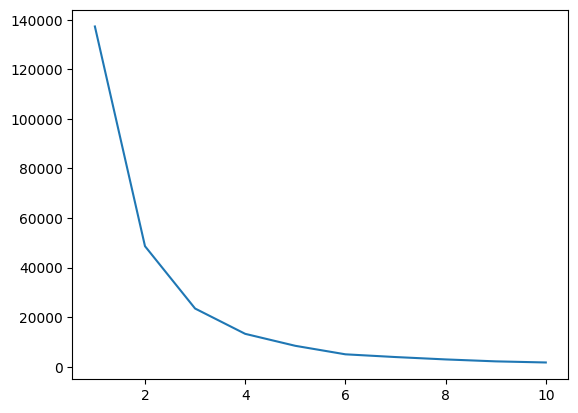

In [27]:
plt.plot(range(1,11),c1_inertia)

In [28]:
c1=KMeans(n_clusters=3)

In [29]:
c1.fit(df['Annual Income (k$)'].values.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [30]:
c1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [31]:
df['IncomeCluster']=c1.labels_

In [32]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeCluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [33]:
df['IncomeCluster'].value_counts()

,count
IncomeCluster,
2,90
0,74
1,36


In [34]:
df.drop('Gender',axis=1).groupby("IncomeCluster").mean()

,Age,Annual Income (k$),Spending Score (1-100)
IncomeCluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


In [35]:
c2_inertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  c2_inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [36]:
c2_inertia

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30241.34361793659,
 25028.020475269397,
 22135.035074930453,
 19755.619860833398]

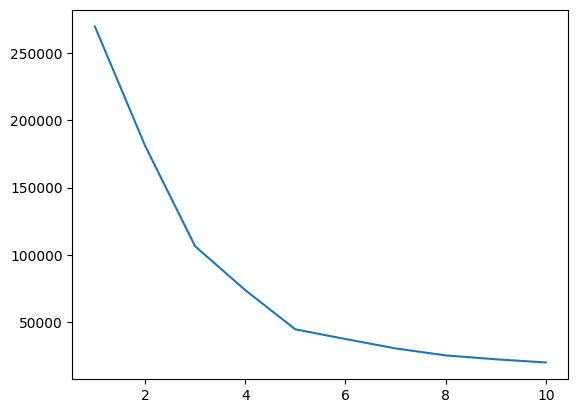

In [37]:
plt.plot(range(1,11),c2_inertia)

In [38]:
c2=KMeans(n_clusters=5)

In [39]:
c2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [40]:
c2.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [41]:
df['IncomeAndScoreCluster']=c2.labels_

In [42]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeCluster,IncomeAndScoreCluster
0,Male,19,15,39,0,0
1,Male,21,15,81,0,4
2,Female,20,16,6,0,0
3,Female,23,16,77,0,4
4,Female,31,17,40,0,0


In [43]:
df['IncomeAndScoreCluster'].value_counts()

,count
IncomeAndScoreCluster,
1,81
3,39
2,35
0,23
4,22


In [46]:
c=pd.DataFrame(c2.cluster_centers_)

In [47]:
c.columns=['x','y']

In [48]:
c

,x,y
0,26.304348,20.913043
1,55.296296,49.518519
2,88.200000,17.114286
3,86.538462,82.128205
4,25.727273,79.363636


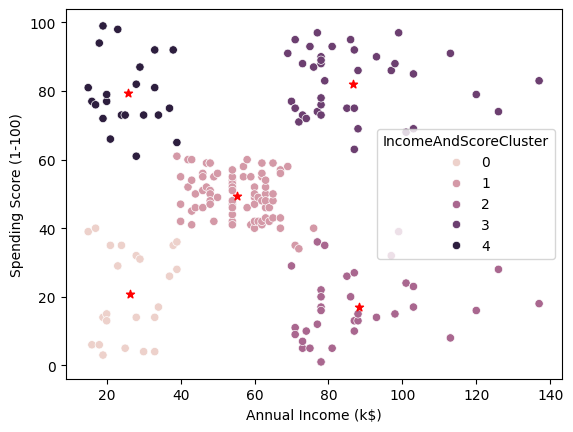

In [52]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='IncomeAndScoreCluster')
plt.scatter(x=c['x'],y=c['y'],marker='*',c='red')

In [54]:
pd.crosstab(df['IncomeAndScoreCluster'],df['Gender'],normalize='index')

Gender,Female,Male
IncomeAndScoreCluster,,
0,0.608696,0.391304
1,0.592593,0.407407
2,0.457143,0.542857
3,0.538462,0.461538
4,0.590909,0.409091


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scale=StandardScaler()

In [61]:
from sklearn import preprocessing

In [62]:
label_encoder = preprocessing.LabelEncoder()

In [63]:
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [64]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeCluster,IncomeAndScoreCluster
0,1,19,15,39,0,0
1,1,21,15,81,0,4
2,0,20,16,6,0,0
3,0,23,16,77,0,4
4,0,31,17,40,0,0


In [66]:
df2=df.drop('IncomeAndScoreCluster',axis=1)

In [67]:
df2=df.drop('IncomeCluster',axis=1)

In [68]:
df2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeAndScoreCluster
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0


In [70]:
df2=pd.DataFrame(scale.fit_transform(df2))

In [71]:
df2.head()

,0,1,2,3,4
0,1.128152,-1.424569,-1.738999,-0.434801,-1.477395
1,1.128152,-1.281035,-1.738999,1.195704,1.842593
2,-0.886405,-1.352802,-1.700830,-1.715913,-1.477395
3,-0.886405,-1.137502,-1.700830,1.040418,1.842593
4,-0.886405,-0.563369,-1.662660,-0.395980,-1.477395


In [72]:
c3_inertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df2)
  c3_inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [73]:
c3_inertia

[999.9999999999998,
 685.0045340314747,
 543.4718120665193,
 453.694801211226,
 378.26680508336875,
 312.19244427652063,
 272.7671852713989,
 234.72568750303725,
 198.1208206206139,
 169.2383879391002]

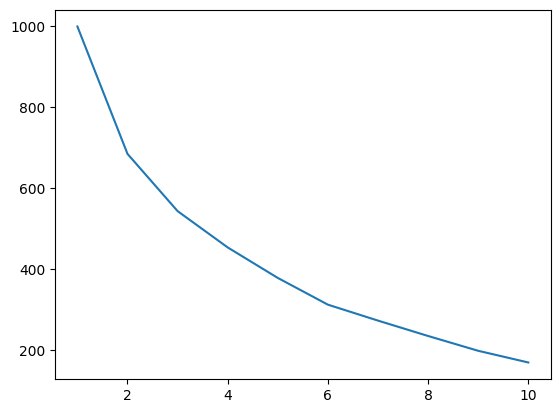

In [75]:
plt.plot(range(1,11),c3_inertia)

In [76]:
c3=KMeans(n_clusters=4)

In [77]:
c3.fit(df2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [78]:
c3.labels_

array([1, 3, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 0,
       0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2], dtype=int32)

In [79]:
df['MultivariateCluster']=c3.labels_

In [80]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeCluster,IncomeAndScoreCluster,MultivariateCluster
0,1,19,15,39,0,0,1
1,1,21,15,81,0,4,3
2,0,20,16,6,0,0,0
3,0,23,16,77,0,4,3
4,0,31,17,40,0,0,0
